In [4]:
import torch
import torch.nn as nn


https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce

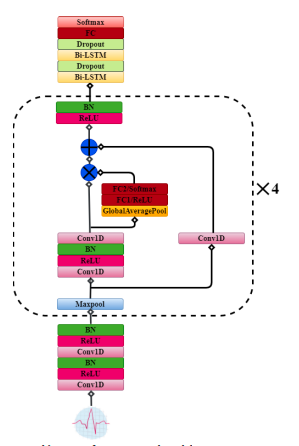

In [39]:
class CNN_BiLSTM(nn.Module):
  def __init__(self, model_params, device=None):
    super(CNN_BiLSTM, self).__init__()
    
    input_dim = model_params['input_dim']
    lstm_hidden_dim = model_params['lstm_hidden_dim']
    num_class = model_params['num_classes']

    self.model1 = nn.Sequential(
        nn.Conv1d(1000, 32, kernel_size=5),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Conv1d(32, 32, kernel_size=5),
        nn.ReLU(),
        nn.BatchNorm1d(32)
    )
    
    self.maxpool1 = nn.MaxPool1d(5, 1)

    self.model2 = nn.Sequential(
        nn.Conv1d(32, 64, 5),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Conv1d(64, 64, 5)
    )
    
    self.conv_identity = nn.Conv1d(32, 64, 5)
    self.maxpool_identiy = nn.MaxPool1d(5,1)
    
    self.avgpool = nn.AvgPool1d(5, 1)

    self.model3 = nn.Sequential(      
        nn.Linear(80, 32),
        nn.ReLU(),
        nn.Linear(32, 80),
        nn.Softmax()
    )

    self.relu_end = nn.ReLU()
    self.nb_end = nn.BatchNorm1d(64)

    self.model_lstm = nn.Sequential(
        nn.LSTM(80, lstm_hidden_dim, 64, bidirectional=True),
        nn.Dropout(0.2),
        nn.LSTM(64, lstm_hidden_dim, 64, bidirectional=True),
        nn.Dropout(0.5),
        nn.Linear(64, num_class),
        nn.Softmax()
    )

  def forward(self, x):
    x = self.model1(x)
    print(x.shape)
    
    x1 = self.maxpool1(x)
    print(x1.shape)
    
    x11 = self.model2(x1)
    print(x11.shape)

    x12 = self.conv_identity(x1)
    x12 = self.maxpool_identiy(x12)
    print(x12.shape)

    xa = self.avgpool(x11)
    print(xa.shape)

    x111 = self.model3(x11)
    print(x111.shape)

    x2 = (x11 * x111) + x12
    print(x2.shape)

    x3 = self.relu_end(x2)
    x3 = self.nb_end(x3)
    print(x3.shape)

    x4 = self.model_lstm(x3)
    print(x4.shape)





    
        

  


nn.Conv1d() applies 1D convolution over the input. nn.Conv1d() expects the input to be of the shape [batch_size, input_channels, signal_length] .

In [40]:


model_paramenters = {
    'input_dim': 100,
    'lstm_hidden_dim':32,
    'num_classes':5
}

net = CNN_BiLSTM(model_paramenters)

batch_size = 1
beat_length = 100
signal_channels = 1000 # length of the signal

input = torch.randn((batch_size, signal_channels, beat_length))

y = net(input)
print(y.shape)

torch.Size([1, 32, 92])
torch.Size([1, 32, 88])
torch.Size([1, 64, 80])
torch.Size([1, 64, 80])
torch.Size([1, 64, 76])
torch.Size([1, 64, 80])
torch.Size([1, 64, 80])
torch.Size([1, 64, 80])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


TypeError: ignored